# GLOC Detector Dev Notes

WNixalo

2018/2/9

---

**Finetuning 1st Stage Detector**

RetinaNet is really proving to be a pain. Mostly because I'm not proficient in Keras and I don't want to take the time right now to be. I also don't understand why I'm creating three versions of a model using the [Boring Detector's](https://github.com/lexfridman/boring-detector/blob/master/train.py) train script. I can understand having two version of a model share memory, train & predict. But why the base 'model' too? It feels somewhat different than the stock RetinaNet I was originally using, although the training script is from RetinaNet's own API...

There's a very large overhead for initializing RetinaNet with Keras/TensorFlow too. `2745MiB`.. My machine only has `3017MiB` of GPU RAM. Simple solve to send everything to the cloud and train on my AWS p2 instance. I want to wrap up this project, not port everything over.

At bs=1: `2842MiB`. That's 97 MB / image (400x400).

Gives me an overhead of 272 MB, or enough room for a batch size of 2.

I just need it to *basically* work, nothing special. I'll try training with `bs=2` and play w/ hypars -- hopefully that'll give good results.

If not... oy. My techie side wants to swap out Keras/TF and put in a Fastai/PT CAM-based detector. My exec side wants me to get this project done **now** and get started on What's next.

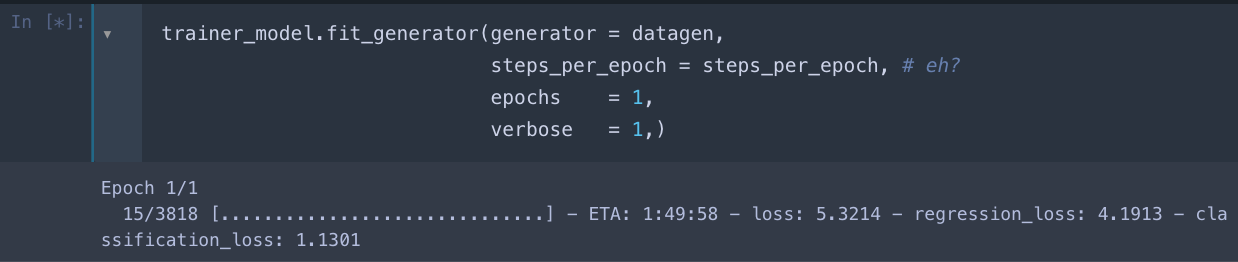

Okay.. this is not good.

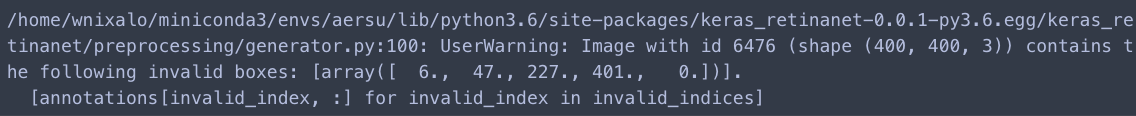

This is also bad. I formatted the interstage labels exactly as RetinaNet wanted them -- as far as I could tell. Why would some of the labels be invalid (a 5-item array instaed of 4) while others are fine? They were all made the same..


WNixalo

2018/2/8

---

I thought it'd be a good idea to have a notebook of thoughts/ideas/notes as I work on my projects. May help to keep my head in order (idea perhaps for future teams?) and also help with documentation for post-project writeups.. Hmm.

**Finetuning 1st Stage Detector**

CAMs Heatmaps FastAI replacing Keras/RetinaNet if I decide to make further major changes to the first stage detector.

Keras learning-rate is part of the optimizer attribute of the model? Doesn't seem immediately accessible: `model.optimizer.lr` returns: 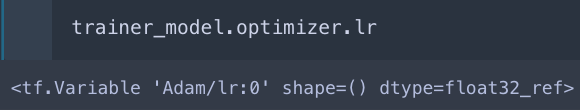